# Linear Regression

## Step 1: Generate some sample data

To Generate some sample data, we first define the coefficients of a polynomial function we want the data to follow, generate n datapoints according to that function, and offset the datapoints by taking a random value from a gaussian distribution, where the mean of the distribution is the datapoint value, and the standard deviation is user defined. This allows the data to be 'blurred' in order to more accurately represent what a real dataset might look like

In [199]:
# Import libraries
from src.generate_data import generate_poly_data
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [217]:
%%capture
# Generate data
coeffs = [2, 3]
n_points = 100
percentage_error = 10
data = generate_poly_data(coeffs, n_points, percentage_error)

<AxesSubplot:xlabel='x', ylabel='y'>

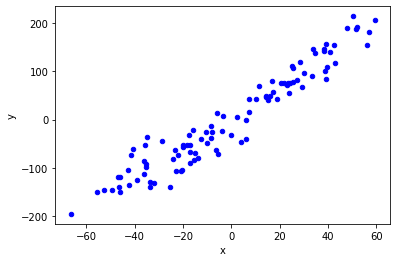

In [218]:
# plot data
data.plot(kind='scatter', x='x', y='y', color='blue')

## Step 2: Build a linear regression algorithm

Now that we have some sample data to fit, lets build the algorithm. We start by defining a hypothesis function $h_\theta(x) = \theta_0 + \sum_{i=1}^n{\theta_ix^i}$ where $x$ is our feature (in this case we only have one feature), $\theta$ is a parameter vector (since we only have 1 feature, $\theta$ is 1D), and n is the order of the polynomial function we think our data follows. The idea is to optimise $\theta$ such that our fit is the fit that is closest to all of our datapoints. In other words, we need to minimise the squared error cost function: $J(\theta) = \frac{1}{2m}\sum_{i=1}^m{(h_\theta(x^i)-y^i)^2} $ where $m$ is the number of training examples, and $i$ represents the $i$th example..

In [223]:
# define hypothesis. Theta is an array of parameters, x is the feature value and 'order' is the order of the polynomial.
def h_xi(theta,x,order):
    x_vec = []
    for i in range(0, order+1):
        x_vec.append(x**i)
    return theta.dot(x_vec)

In [203]:
# define cost function. h_x is a numpy array where each element represents the results for one value of x. y is the 'correct' answer for each value of x.
def j_theta(h_x, y):
    sum_val = 0
    for h_xi, yi in zip(h_x, y):
        sum_val+=((h_xi - yi)**2)

    return sum_val/(2*len(h_x))

We could find the minimum of the cost function by finding it's stationary point (i.e. when the derivative is zero). But, this is not always practical in practice. So, we will use gradient descent. But first, let's visualise our cost function

In [224]:
# Generate values of the cost function (and the 'correct' answer for the hypothesis) for multiple values of theta
order = 1

step = 0.25
lower_bound = -5
upper_bound = 5

theta_ranges = []
for i in np.arange(0,order+1,1):
    theta_ranges.append(np.arange(lower_bound, upper_bound + step, step))

# Generate all combinations of parameter values 
theta = np.array(np.meshgrid(*theta_ranges)).T.reshape(-1,order+1)

# Calculate the hypothesis values and cost function for our dataset
cost_values = []
counter = 0
max_counter = len(theta)
checkpoint = max_counter/100
for theta_i in theta:
    hypotheses= []
    y = []
    for i in range(0,len(data)):
        hypotheses.append(h_xi(theta_i, data.iloc[i,0], order))
        y.append(data.iloc[i,1])

    cost = j_theta(hypotheses, y)
    cost_values.append(cost)

    if counter >= checkpoint:
        counter = 0
        print(".",end='')
    counter += 1
print("!")

cost_function = pd.DataFrame(theta)
cost_function['Cost'] = cost_values

..................................................................................................!


<AxesSubplot:xlabel='1', ylabel='Cost'>

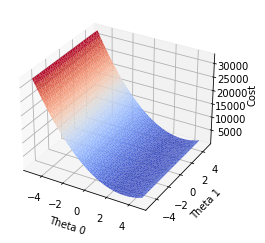

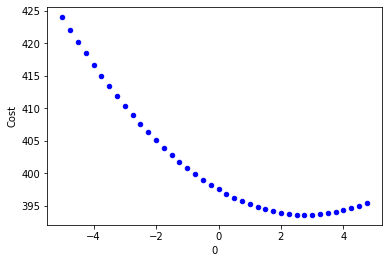

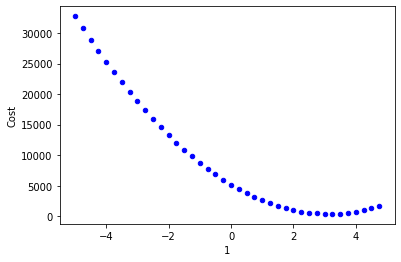

In [221]:
# plotting the cost function against each parameter is quite complex and involves finding the value of every other parameter that minimises the cost function, keeping those fixed, and then plotting the cost function against the desired parameter. So for now - we'll just draw a surface plot (if applicable) and samples of the individual parameter functions as a sanity check

if order == 1:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_trisurf(cost_function[1], cost_function[0], cost_function.Cost, cmap=cm.coolwarm)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Cost', rotation=90)


cost_function_param2_edit = cost_function.loc[cost_function[1] == 3]
cost_function_param1_edit = cost_function.loc[cost_function[0] == 2]
cost_function_param2_edit.plot(kind='scatter', x=0, y='Cost', color='blue')
cost_function_param1_edit.plot(kind='scatter', x=1, y='Cost', color='blue')

Now that we have calculated the cost function, we can perform gradient descent to find the minimum of the cost function. 

In [ ]:
def grad_descent(data, learning_rate, param_to_optimise, current_param_values):
    current_param_value = current_param_values[param_to_optimise]
    upper_limit = current_param_value + (step*0.5)
    lower_limit = current_param_value - (step*0.5)

    upper_param_values, lower_param_values = current_param_values, current_param_values
    upper_param_values[param_to_optimise] = upper_limit
    lower_param_values[param_to_optimise] = lower_limit

    upper_hypotheses = []
    lower_hypotheses = []
    y = []
    for i in range (0,len(data)):
        upper_hypotheses.append(h_xi(upper_param_values, data.iloc[i,0], order))
        lower_hypotheses.append(h_xi(upper_param_values, data.iloc[i,0], order))
        y.append(daa.iloc[i,1])

    upper_cost_function = j_theta(upper_hypotheses, y)
    lower_cost_function = j_theta(lower_hypotheses, y)

    derivative = (upper_cost_function - lower_cost_function)/(upper_limit - lower_limit)
    updated_param = current_param_value - (learning_rate*derivative)
    
    return updated_param